In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
ls

Decision tree.ipynb
Fitting with Larch lib.ipynb
GaussianProcessRegression_fitcurve.ipynb
Larch/
MLPRegressor_predict_CN.ipynb
MLPRegressor_predict_CN_Cu_Te.ipynb
Multi_Gaussin_try.ipynb
RF_10000data_derivate.ipynb
RF_predict_atom_number.ipynb
Untitled Folder/
Untitled.ipynb
XANES_ML_Data.xlsx
__ init __.py
add_noise_then_smooth.ipynb
central_copper_list.csv
first_second_derivate_CN_10000average_spectra.csv
model_training.ipynb
mu10000.csv
mu_cn100.csv
mu_cn10000.csv
multiple_peak_deconvolution.ipynb
predict_CN_10000sample.ipynb
predict_descriptors.ipynb
sample_spectrum.csv
sys100.csv
weights100.csv


In [15]:
df = pd.read_csv('mu_cn10000.csv')

In [23]:
Data_1  = pd.read_excel('FEFF9_XANES.xlsx', 'Cu1.5Te')
Data_2  = pd.read_excel('FEFF9_XANES.xlsx', 'Cu2Te')
Data_3  = pd.read_excel('FEFF9_XANES.xlsx', 'CuTe')

mult = 5

In [24]:
coeff_a = 0.32
coeff_b = 0.27
coeff_c = 0.41
coeffs_known = [0.0]*3
coeffs_known[0] = coeff_a
coeffs_known[1] = coeff_b
coeffs_known[2] = coeff_c

In [25]:
from scipy.interpolate import UnivariateSpline

In [26]:
xs = np.linspace(8970, 9050, 1000)

In [27]:
s1 = UnivariateSpline(Data_1.omega[:], Data_1.mu[:], s=0)
y1 = s1(xs)
s2 = UnivariateSpline(Data_2.omega[:], Data_2.mu[:], s=0)
y2 = s2(xs)
s3 = UnivariateSpline(Data_3.omega[:], Data_3.mu[:], s=0)
y3 = s3(xs)


In [28]:
XX = [[0.0 for a in range(3)] for b in range(1000)]
YY = [0.0]*1000

In [29]:
for i in range(0,1000):
    XX[i][0] = y1[i]
    XX[i][1] = y2[i]
    XX[i][2] = y3[i]

    YY[i] = y1[i]*coeff_a + y2[i]*coeff_b + y3[i]*coeff_c + 0.10

In [30]:
n = 1000
m = 3

In [31]:
df_YY = pd.DataFrame(YY).transpose()


In [32]:
df_YY.max()

0      0.129952
1      0.130216
2      0.130477
3      0.130735
4      0.130992
         ...   
995    1.114802
996    1.114897
997    1.114986
998    1.115069
999    1.115144
Length: 1000, dtype: float64

In [34]:
XX = xs

In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [37]:
YY = min_max_scaler.fit_transform(np.array(df_YY).reshape(-1, 1))

In [38]:
YY.max()

1.0

In [39]:
YY.std()

0.35600677439223855

In [40]:
def add_noise_to_spectrum(X, y, noise_std_der_percent = 0.05):
    pure = y
    y_std = y.std()
    noise = np.random.normal(0, noise_std_der_percent*y_std, pure.shape)
    signal = pure + noise
    plt.plot(X, signal)
    noised_Y = signal
    return noised_Y
    

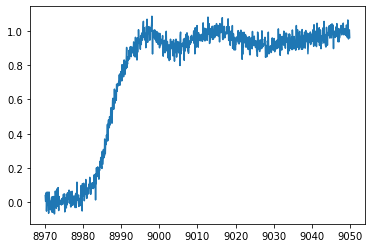

In [41]:
noised_Y = add_noise_to_spectrum(XX, YY, noise_std_der_percent = 0.1)

In [42]:
from scipy.signal import savgol_filter

In [43]:
from scipy.signal import savgol_filter
def smooth_data(Y, window_length = 101, polyoreder = 0):
    new_Y = savgol_filter(Y, window_length = 51, polyorder =1)
    
    return new_Y

In [44]:
smoothed_y = smooth_data(np.array(noised_Y).reshape(-1), window_length = 101, polyoreder = 0)

In [45]:
smoothed_y.shape

(1000,)

In [46]:
noised_Y_minmax = min_max_scaler.fit_transform(smoothed_y.reshape(-1, 1) )

In [47]:
noised_Y_minmax

array([[4.38215329e-03],
       [4.29534031e-03],
       [4.20852734e-03],
       [4.12171436e-03],
       [4.03490138e-03],
       [3.94808841e-03],
       [3.86127543e-03],
       [3.77446246e-03],
       [3.68764948e-03],
       [3.60083650e-03],
       [3.51402353e-03],
       [3.42721055e-03],
       [3.34039757e-03],
       [3.25358460e-03],
       [3.16677162e-03],
       [3.07995865e-03],
       [2.99314567e-03],
       [2.90633269e-03],
       [2.81951972e-03],
       [2.73270674e-03],
       [2.64589376e-03],
       [2.55908079e-03],
       [2.47226781e-03],
       [2.38545484e-03],
       [2.29864186e-03],
       [2.21182888e-03],
       [1.63262337e-03],
       [1.79576711e-03],
       [1.27000448e-03],
       [5.30367375e-04],
       [1.54290607e-03],
       [1.87094770e-03],
       [4.55457830e-04],
       [0.00000000e+00],
       [1.13732756e-03],
       [1.85413348e-03],
       [2.56403208e-03],
       [3.86456313e-03],
       [3.64106530e-03],
       [1.86705804e-03],


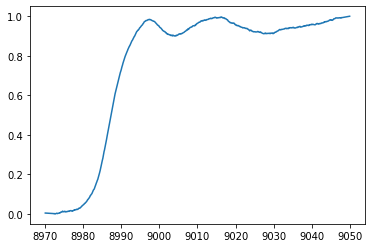

In [48]:
plt.plot(XX, noised_Y_minmax)

Text(0, 0.5, 'absorption')

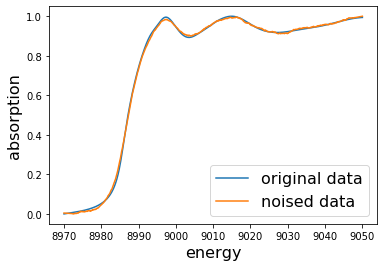

In [49]:
plt.figure(figsize=[20,4])

ax1 = plt.subplot(1,3,1)
ax1.plot(XX, YY, label="original data")
ax1.plot(XX, noised_Y_minmax, label="noised data" )
ax1.legend( fontsize = 16)
plt.xlabel("energy", fontsize= 16)
plt.ylabel("absorption", fontsize= 16)

In [50]:
a = np.linspace(0, 1, 1000)

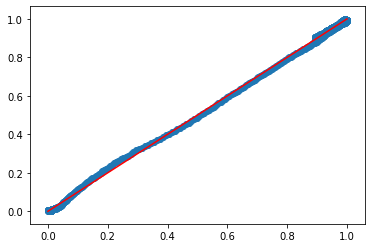

In [51]:
plt.scatter(YY, noised_Y_minmax)
plt.plot(a,a,color = 'red')

In [52]:
from scipy.stats import sem

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(YY, noised_Y_minmax)

0.999544456155266

In [6]:
import xanes_derivatives

In [77]:
original_df = pd.DataFrame( XX, noised_Y_minmax.reshape(1000), index = 'None')

TypeError: __init__() got multiple values for argument 'index'

range from 8970 to 9050

In [76]:
original_df 

,0
0.004382,8970.00000
0.004295,8970.08008
0.004209,8970.16016
0.004122,8970.24024
0.004035,8970.32032
...,...
0.998883,9049.67968
0.999163,9049.75976
0.999442,9049.83984
0.999721,9049.91992


In [71]:
import numpy as np

def xanes_derivatives(X, Y, dx=0.080808080808):
    '''
    This function calculates and returns the first and second derivative of a series of XANES spectra.
    Inputs:
        mu_df = Pandas dataframe of averaged XANES spectra absorption values.
        dx = distance between uniformly distributed energy values in XANES spectra. Defaulted to value provided in data.
    '''
    mu_labels = []
    

    mu_df = mu_df[mu_labels]

    dmu1 = np.zeros([len(mu_df), len(mu_df.columns)-1])
    dmu2 = np.zeros([len(mu_df), np.shape(dmu1)[1]-1])

    for i in range(len(mu_df)):
        for j in range(np.shape(dmu1)[1]):
            dmu1[i, j] = (mu_df.iloc[i, j+1] - mu_df.iloc[i, j]) / dx

    for i_ in range(len(mu_df)):
        for j_ in range(np.shape(dmu2)[1]):
            dmu2[i_, j_] = (dmu1[i_, j_+1] - dmu1[i_, j_]) / dx

    return dmu1, dmu2

In [70]:
d1, d2 = xanes_derivatives.xanes_derivatives(original_df)

KeyError: "None of [Index(['Mu1', 'Mu2', 'Mu3', 'Mu4', 'Mu5', 'Mu6', 'Mu7', 'Mu8', 'Mu9', 'Mu10',\n       'Mu11', 'Mu12', 'Mu13', 'Mu14', 'Mu15', 'Mu16', 'Mu17', 'Mu18', 'Mu19',\n       'Mu20', 'Mu21', 'Mu22', 'Mu23', 'Mu24', 'Mu25', 'Mu26', 'Mu27', 'Mu28',\n       'Mu29', 'Mu30', 'Mu31', 'Mu32', 'Mu33', 'Mu34', 'Mu35', 'Mu36', 'Mu37',\n       'Mu38', 'Mu39', 'Mu40', 'Mu41', 'Mu42', 'Mu43', 'Mu44', 'Mu45', 'Mu46',\n       'Mu47', 'Mu48', 'Mu49', 'Mu50', 'Mu51', 'Mu52', 'Mu53', 'Mu54', 'Mu55',\n       'Mu56', 'Mu57', 'Mu58', 'Mu59', 'Mu60', 'Mu61', 'Mu62', 'Mu63', 'Mu64',\n       'Mu65', 'Mu66', 'Mu67', 'Mu68', 'Mu69', 'Mu70', 'Mu71', 'Mu72', 'Mu73',\n       'Mu74', 'Mu75', 'Mu76', 'Mu77', 'Mu78', 'Mu79', 'Mu80', 'Mu81', 'Mu82',\n       'Mu83', 'Mu84', 'Mu85', 'Mu86', 'Mu87', 'Mu88', 'Mu89', 'Mu90', 'Mu91',\n       'Mu92', 'Mu93', 'Mu94', 'Mu95', 'Mu96', 'Mu97', 'Mu98', 'Mu99',\n       'Mu100'],\n      dtype='object')] are in the [columns]"